In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
miss_values = ["?"]
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv", na_values = miss_values)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
# Check for missing or nan data
df.isnull().sum().sum()
df.isna().sum().sum()

192849

In [6]:
# Get column names from data
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
# Get data types of all columns
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [8]:
# To simplify I changed ranges to a single integer value. 
df.loc[df.age== '[0-10)','age'] = 0;
df.loc[df.age== '[10-20)','age'] = 10;
df.loc[df.age== '[20-30)','age'] = 20;
df.loc[df.age== '[30-40)','age'] = 30;
df.loc[df.age== '[40-50)','age'] = 40;
df.loc[df.age== '[50-60)','age'] = 50;
df.loc[df.age== '[60-70)','age'] = 60;
df.loc[df.age== '[70-80)','age'] = 70;
df.loc[df.age== '[80-90)','age'] = 80;
df.loc[df.age== '[90-100)','age'] = 90;
df.age = df.age.astype(np.int32)

In [9]:
# To simplify I changed ranges to a single integer value.
df.loc[df.max_glu_serum== 'None','max_glu_serum'] = 0;
df.loc[df.max_glu_serum== 'Norm','max_glu_serum'] = 100;
df.loc[df.max_glu_serum== '>200','max_glu_serum'] = 200;
df.loc[df.max_glu_serum== '>300','max_glu_serum'] = 300;
df.max_glu_serum = df.max_glu_serum.astype(np.int32)

In [10]:
# To simplify I changed all columns with ranges to a single integer value.
df.loc[df.A1Cresult== 'None','A1Cresult'] = 0;
df.loc[df.A1Cresult== 'Norm','A1Cresult'] = 5;
df.loc[df.A1Cresult== '>7','A1Cresult'] = 7;
df.loc[df.A1Cresult== '>8','A1Cresult'] = 8;
df.A1Cresult = df.A1Cresult.astype(np.int32)

In [11]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [12]:
#Creating dataframe with columns i want (excluding columns like race and all the various medication columns
df1= df [['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'number_diagnoses', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1','diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'readmitted']]

In [55]:
df1

,encounter_id,patient_nbr,race,gender,age,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,readmitted
0,2278392,8222157,Caucasian,Female,0,1,6,25,1,1,0,0,0,250.83,NaN,NaN,0,0,NO
1,149190,55629189,Caucasian,Female,10,9,1,1,7,3,0,0,0,276,250.01,255,0,0,>30
2,64410,86047875,AfricanAmerican,Female,20,6,1,1,7,2,2,0,1,648,250,V27,0,0,NO
3,500364,82442376,Caucasian,Male,30,7,1,1,7,2,0,0,0,8,250.43,403,0,0,NO
4,16680,42519267,Caucasian,Male,40,5,1,1,7,1,0,0,0,197,157,250,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,9,1,3,7,3,0,0,0,250.13,291,458,0,8,>30
101762,443847782,74694222,AfricanAmerican,Female,80,9,1,4,5,5,0,0,1,560,276,787,0,0,NO
101763,443854148,41088789,Caucasian,Male,70,13,1,1,7,1,1,0,0,38,590,296,0,0,NO
101764,443857166,31693671,Caucasian,Female,80,9,2,3,7,10,0,0,1,996,285,998,0,0,NO


In [59]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'number_diagnoses', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'readmitted'],
      dtype='object')

In [58]:
#Getting statistics for df1 data columns - Can tell max number of days in hospital was 14 days and minimum at least 1 and also the max number of diagnoses in a patient was 16
df1.describe()

,encounter_id,patient_nbr,age,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,60.967022,7.422607,2.024006,3.715642,5.754437,4.395987,0.369357,0.197836,0.635566,9.196588,1.153254
std,1.026403e+08,3.869636e+07,15.940838,1.933600,1.445403,5.280166,4.064081,2.985108,1.267265,0.930472,1.262863,43.268754,2.626477
min,1.252200e+04,1.350000e+02,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,50.000000,6.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.523890e+08,4.550514e+07,60.000000,8.000000,1.000000,1.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.302709e+08,8.754595e+07,70.000000,9.000000,3.000000,4.000000,7.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.438672e+08,1.895026e+08,90.000000,16.000000,8.000000,28.000000,25.000000,14.000000,42.000000,76.000000,21.000000,300.000000,8.000000


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int32 
 5   number_diagnoses          101766 non-null  int64 
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101745 non-null  object
 14  diag

In [61]:
# Checking to see if any columns have '?'
(df1=='?').sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
readmitted                  0
dtype: int64

In [15]:
print(df1.A1Cresult.value_counts())

0    84748
8     8216
5     4990
7     3812
Name: A1Cresult, dtype: int64


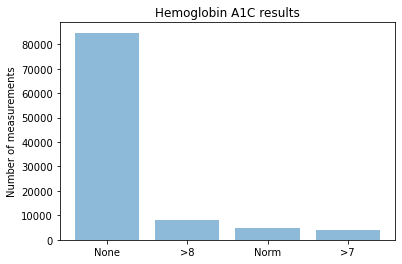

In [16]:
# Bar chart of 'A1Cresult'

# Hemoglobin A1C is a 90-day measurement of blood glucose levels.
# An A1C result of < 7 may be desirable.

# Data
vals = ('None', '>8', 'Norm', '>7')
y_pos = np.arange(len(df1['A1Cresult'].value_counts()))
results = df1['A1Cresult'].value_counts()

# Set up bar chart
plt.bar(y_pos, results, align='center', alpha=0.5)
plt.xticks(y_pos, vals)
plt.ylabel('Number of measurements')
plt.title('Hemoglobin A1C results')
 
plt.show();

In [17]:
print(df1.number_emergency.value_counts())

0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64


<AxesSubplot:xlabel='race'>

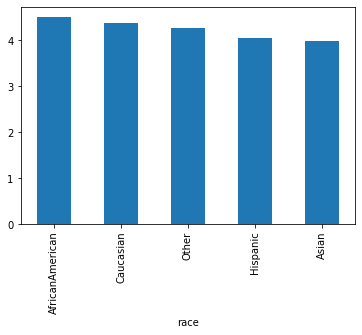

In [64]:
# Analyzing the average days spent in the hospital by race and based on the bar chart the Asians spent the least time in the hospital whereas African Americans spent the most
df1.groupby(['race'])['time_in_hospital'].mean().sort_values(ascending=False).plot(kind="bar")

In [78]:
df1.groupby(['discharge_disposition_id']).count()

,encounter_id,patient_nbr,race,gender,age,number_diagnoses,admission_type_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,readmitted
discharge_disposition_id,,,,,,,,,,,,,,,,,,
1,60234,60234,58768,60234,60234,60234,60234,60234,60234,60234,60234,60234,60228,59951,59065,60234,60234,60234
2,2128,2128,2061,2128,2128,2128,2128,2128,2128,2128,2128,2128,2127,2125,2117,2128,2128,2128
3,13954,13954,13614,13954,13954,13954,13954,13954,13954,13954,13954,13954,13950,13928,13913,13954,13954,13954
4,815,815,765,815,815,815,815,815,815,815,815,815,815,810,806,815,815,815
5,1184,1184,1143,1184,1184,1184,1184,1184,1184,1184,1184,1184,1182,1179,1170,1184,1184,1184
6,12902,12902,12698,12902,12902,12902,12902,12902,12902,12902,12902,12902,12898,12891,12840,12902,12902,12902
7,623,623,611,623,623,623,623,623,623,623,623,623,622,618,605,623,623,623
8,108,108,107,108,108,108,108,108,108,108,108,108,108,108,107,108,108,108
9,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21


<AxesSubplot:xlabel='gender'>

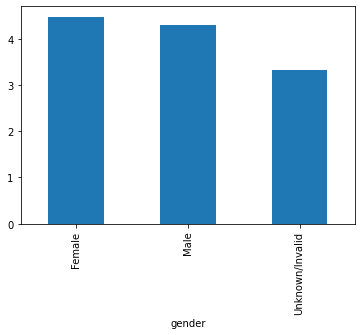

In [65]:
#Analyzing which gender spent more time in the hospital- appears females spent more time than males (ignoring the unknowns)
df1.groupby(['gender'])['time_in_hospital'].mean().sort_values(ascending=False).plot(kind="bar")

Text(0, 0.5, 'Emergency Department visit count')

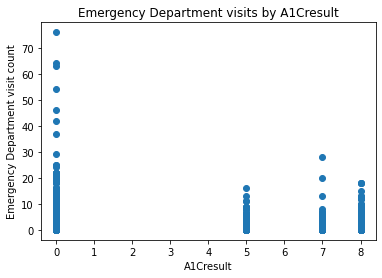

In [18]:
# Scatter plot to show number of emergency visits based on A1C - can conclude not direct correlation with High A1C
plt.scatter(df1['A1Cresult'], df1['number_emergency'])
plt.title('Emergency Department visits by A1Cresult')
plt.xlabel('A1Cresult')
plt.ylabel('Emergency Department visit count')

In [19]:
print(df1.number_diagnoses.value_counts())

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64


In [20]:
#Count of patients in various age groups in our population- conclusion is that majority of the patients in population are older than 50
print(df1.age.value_counts())

70    26068
60    22483
50    17256
80    17197
40     9685
30     3775
90     2793
20     1657
10      691
0       161
Name: age, dtype: int64


In [62]:
print(df1.race.value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [24]:
print(df1.diag_1.value_counts())

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
207       1
366       1
61        1
V60       1
318       1
Name: diag_1, Length: 716, dtype: int64


<AxesSubplot:xlabel='age'>

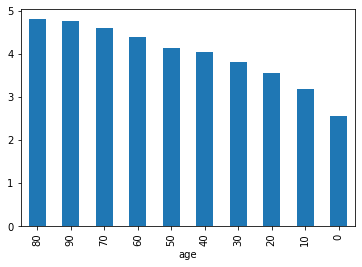

In [66]:
# Bar graph to analyze average number of days spent in the hospital by age - Result = the older the person the more time spent in the hospital
df.groupby(['age'])['time_in_hospital'].mean().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='gender'>

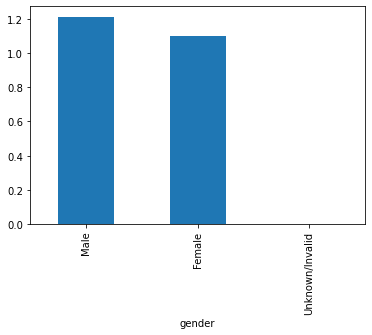

In [80]:
# Analyzing the average number of days spent in the hospital by age - Result Males appear to be prone to higher A1C numbers
df.groupby(['gender'])['A1Cresult'].mean().sort_values(ascending=False).plot(kind="bar")

In [81]:
df2= df1 [['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'diag_1', 'A1Cresult']]

In [82]:
df2

,race,gender,admission_type_id,discharge_disposition_id,time_in_hospital,diag_1,A1Cresult
0,Caucasian,Female,6,25,1,250.83,0
1,Caucasian,Female,1,1,3,276,0
2,AfricanAmerican,Female,1,1,2,648,0
3,Caucasian,Male,1,1,2,8,0
4,Caucasian,Male,1,1,1,197,0
...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,1,3,3,250.13,8
101762,AfricanAmerican,Female,1,4,5,560,0
101763,Caucasian,Male,1,1,1,38,0
101764,Caucasian,Female,2,3,10,996,0


In [83]:
df2.groupby(['diag_1']).count()

,race,gender,admission_type_id,discharge_disposition_id,time_in_hospital,A1Cresult
diag_1,,,,,,
10,1,1,1,1,1,1
11,10,10,10,10,10,10
110,2,2,2,2,2,2
112,73,73,73,73,73,73
114,1,1,1,1,1,1
...,...,...,...,...,...,...
V63,8,8,8,8,8,8
V66,2,2,2,2,2,2
V67,1,1,1,1,1,1


In [86]:
df3 = df2[(df2['diag_1'] == '428')]

In [87]:
df3

,race,gender,admission_type_id,discharge_disposition_id,time_in_hospital,diag_1,A1Cresult
7,Caucasian,Male,1,1,5,428,0
12,Caucasian,Female,1,3,7,428,0
13,Caucasian,Male,1,6,10,428,0
29,Caucasian,Female,1,2,5,428,0
34,Caucasian,Female,2,11,5,428,0
...,...,...,...,...,...,...,...
101695,Caucasian,Male,2,2,4,428,8
101699,Caucasian,Female,1,6,4,428,0
101702,NaN,Male,1,3,5,428,0
101718,Caucasian,Female,1,1,2,428,0


<AxesSubplot:xlabel='A1Cresult', ylabel='gender'>

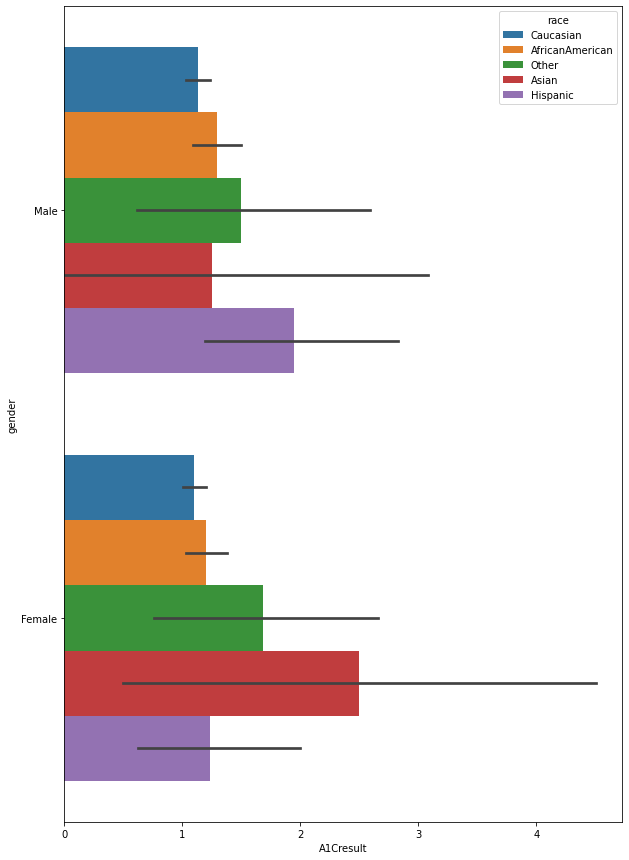

In [90]:
#Barplot with Discharge disposition by race for those with diagnosis 428 = Heart Failure
# More hispanic males with elevated A1C and Asian females with elevated A1C had heart failure
plt.figure(figsize=[10,15])
sns.barplot(x='A1Cresult', y='gender',hue='race',data = df3)